<a href="https://colab.research.google.com/github/hkhaire2011/Handwritten-Digit-Prediction/blob/main/DigitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


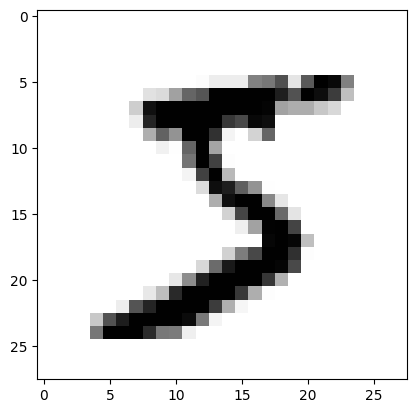

5


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(xtrain[0],cmap='binary')
plt.show()
print(ytrain[0])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical
ytest_encoded = to_categorical(ytest)
ytrain_encoded = to_categorical(ytrain)


In [ ]:
print(ytest_encoded)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import numpy as np

xtrain_reshaped =  np.reshape(xtrain,(60000,784))
ytrain_reshaped = np.reshape(ytrain,(60000))
xtest_reshaped =  np.reshape(xtest,(10000,784))
ytest_reshaped = np.reshape(ytest,(10000))

In [ ]:
print(set(xtrain_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [ ]:
xmean = np.mean(xtrain_reshaped)
xstd = np.std(xtrain_reshaped)

eps = 1e-10

xtrain_norm = (xtrain_reshaped-xmean)/(xstd-eps)
xtest_norm = (xtest_reshaped-xmean)/(xstd-eps)

In [ ]:
print(set(xtrain_norm[0]))

{-0.3858901621558113, 1.3069219669865781, 1.179642859532263, 1.8033104860584066, 1.6887592893495231, 2.8215433456929264, 2.7197200597294744, 1.1923707702776947, 2.7960875242020635, 2.4397060233299817, 2.0578687009670364, 2.605168863020591, 2.6433525952568857, 2.783359613456632, 2.2869710943848034, 1.2941940562411465, 0.1614099998977432, 0.9378125553690646, -0.22042732246520177, 2.630624684511454, 2.2106036299122147, 2.4906176663117074, 1.994229147239879, -0.10587612575631829, 2.7706317027112006, 2.1342361654396256, 2.274243183639372, -0.4240738943921058, 0.3905123933155102, 0.2759611966066267, 1.561480181895208, -0.04223657202916079, 1.3451056992228725, -0.0931482150108868, 0.1232262676614487, 1.485112717422619, 2.757903791965769, 1.765126753822112, 0.0723146246797227, -0.28406687619235926, 1.9051337720218586, 1.2687382347502836, 2.1851478084213514, 2.68153632749318, -0.1949715009743388, -0.4113459836466743, 0.2886891073520582, 0.021402981697996704, 0.5687031437515512, 0.61961478673327

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [ ]:
model.compile(
              optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(xtrain_norm,ytrain_encoded)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.3606 - accuracy: 0.8960


In [ ]:
_,accuracy = model.evaluate(xtest_norm,ytest_encoded)
print("Accuracy of model : ",accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9404
Accuracy of model :  94.04000043869019


In [ ]:
preds = model.predict(xtest_norm)
print("Shape of preds : ",preds.shape)

313/313 [==============================] - 1s 2ms/step
Shape of preds :  (10000, 10)


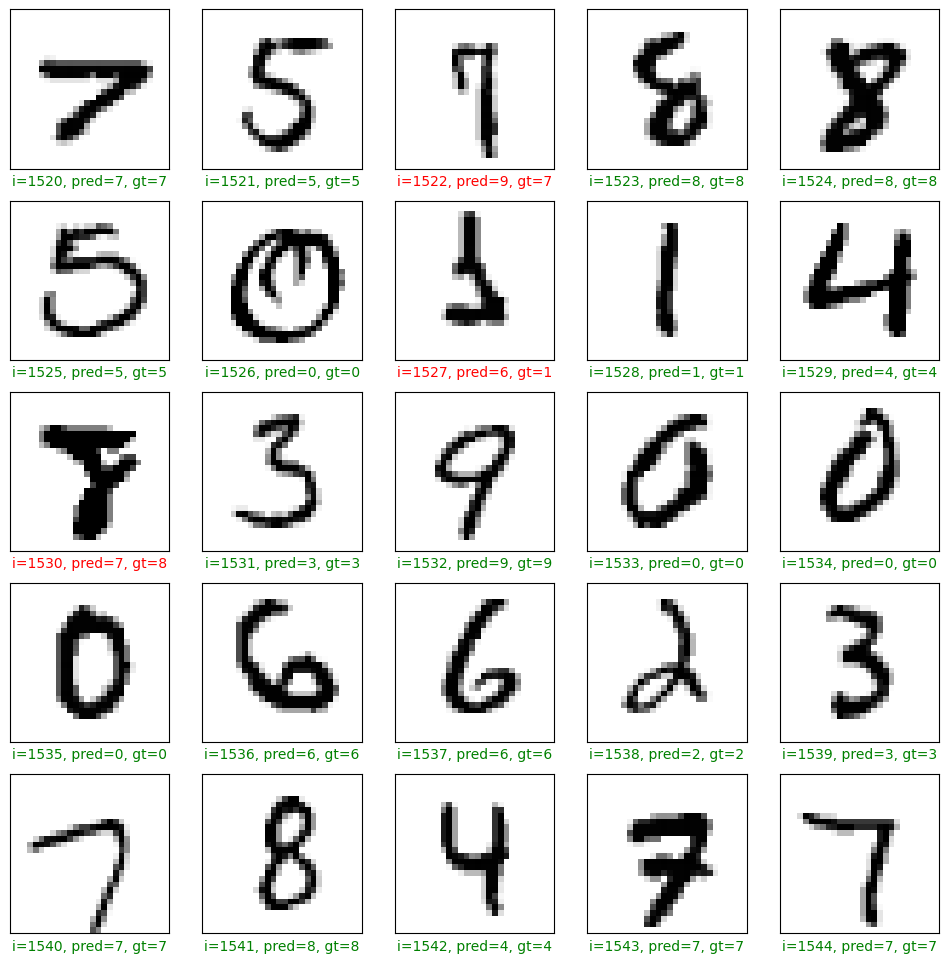

In [ ]:

plt.figure(figsize=(12,12))

start_idx=1520

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_idx+i])

  gt=ytest[start_idx+i]
  col='g'

  if pred!=gt:
    col='r'
  plt.xlabel('i={}, pred={}, gt={}'.format(start_idx+i,pred,gt),color=col)
  plt.imshow(xtest[start_idx+i],cmap='binary')
plt.show()